In [11]:
import pandas as pd
import numpy as np

In [12]:
data_path_2 = r'/Users/harshitgupta/Downloads/HISTORICALSALES_202403151525_copy.csv'
data_path_1 = r'/Users/harshitgupta/Library/CloudStorage/OneDrive-InfiniteLocusPrivateLimited/STORES_202403151524.csv'

df2 = pd.read_csv(data_path_2, usecols=['STOREID', 'YEARWEEK', 'ARTICLE', 'SALES'])
df1 = pd.read_csv(data_path_1, usecols=['STOREID', 'PTNR_REGIONAL_MASTER_CD', 'PTNR_REGIONAL_MASTER_NAME'])


In [13]:
merged_df = pd.merge(df2, df1, on='STOREID', how='left')

In [14]:
pivot_df = merged_df.pivot_table(index=['ARTICLE', 'YEARWEEK'], columns='PTNR_REGIONAL_MASTER_NAME', values='SALES', aggfunc='sum')


pivot_df['Global_Sum'] = pivot_df.sum(axis=1)

In [15]:
pivot_dict = pivot_df.reset_index().to_dict(orient='index')

# Save the dictionary to npy file
np.save('sales_matrices_with_global_sum.npy', pivot_dict)

Plotting and verifying npy


In [16]:
import matplotlib.pyplot as plt

In [17]:
saved_data = np.load('sales_matrices_with_global_sum.npy', allow_pickle=True).item()


df = pd.DataFrame.from_dict(saved_data, orient='index')


In [18]:
df.columns

Index(['ARTICLE', 'YEARWEEK', 'AER RIANTA EUROPE', 'AER RIANTA NEW DELHI',
       'AER RIANTA-OMAN', 'AERRIANTA INTERNATIONAL', 'AGORA EUROPE',
       'ALSHAYA KSA', 'ALSHAYA MIDDLE EAST', 'ALSHAYA RUSSIA (MONEKS)',
       'ALSHAYA TURKEY (BRAVO PARK)', 'ATU REGIONAL MASTER',
       'Agora Trading Anonymi Etaireia', 'Alshaya Poland VSFA',
       'American Beauty Limited', 'Apparel Group India Pvt Ltd',
       'Argus Regional Master', 'Aura Cantik', 'B&S EUROPE',
       'BAHRAIN DUTY FREE REGIONAL MAS', 'CTC- ARI AIRPORTS LTD. LARNACA',
       'DFASS IN-FLIGHT', 'DFS ICELAND', 'DFS PACIFIC', 'DUFRY EUROPE',
       'DUFRY HUDSON', 'DUFRY LATIN AMERICA (IOSC)',
       'Delta Israel Brands Ltd.', 'Dubai Duty Free Regional Maste',
       'Dufry Asia', 'ESSENCE AMERICAS', 'Entas Duty Free Co. Ltd',
       'Everrich Pacific', 'FLEMINGO REGIONAL MASTER', 'GRUPO AXO CHILE',
       'GRUPO AXO MEXICO', 'Heinemann America', 'Heinemann Europe',
       'Hexagon S.p.A', 'Hyundai Regional Master', 'JA

In [19]:
df.reset_index(inplace=True)


/Users/harshitgupta/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


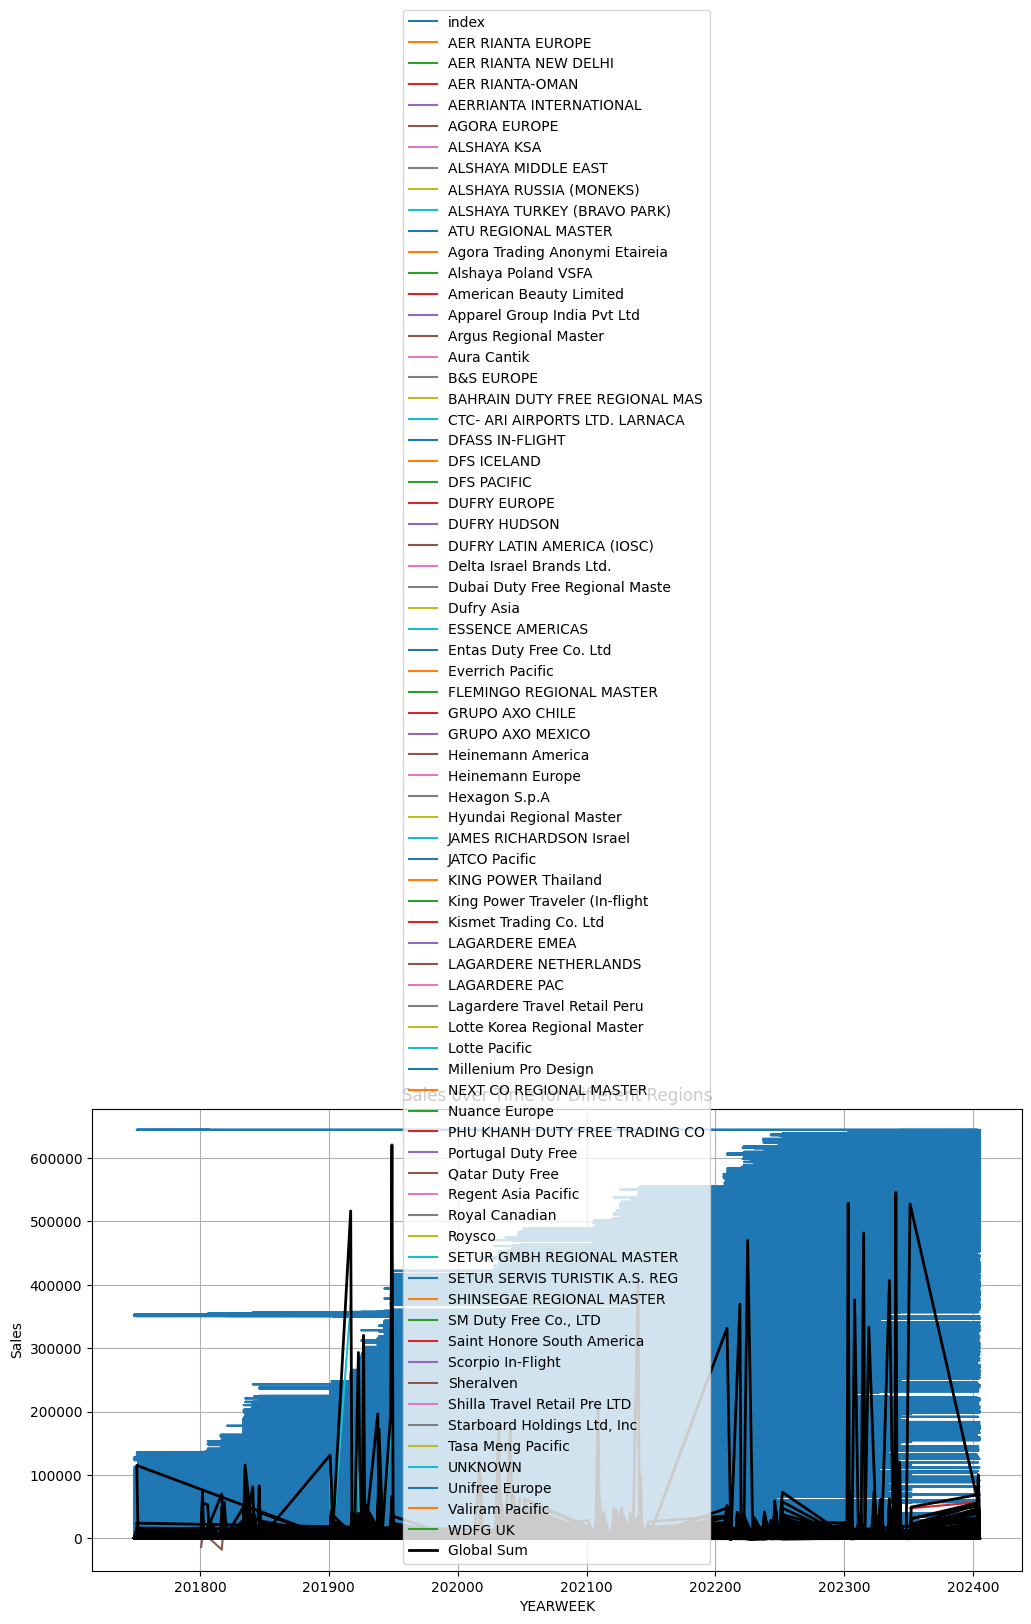

In [20]:
plt.figure(figsize=(12, 6))
for region in df.columns:
    if region != 'Global_Sum' and region != 'ARTICLE' and region != 'YEARWEEK':
        plt.plot(df['YEARWEEK'], df[region], label=region)
plt.plot(df['YEARWEEK'], df['Global_Sum'], label='Global Sum', linewidth=2, color='black')
plt.xlabel('YEARWEEK')
plt.ylabel('Sales')
plt.title('Sales over Time for Different Regions')
plt.legend()
plt.grid(True)
plt.show()